# Testing qiskit amazon braket provider

## Local simulator run

In [1]:
import qiskit_braket_provider

In [2]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)

# Apply H-gate to the first qubit:
circuit.h(0)

# Apply a CNOT to each qubit:
for qubit in range(1, 3):
    circuit.cx(0, qubit)

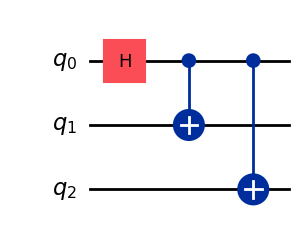

In [3]:
circuit.draw('mpl')

In [4]:
from qiskit_braket_provider import BraketLocalBackend

local_simulator = BraketLocalBackend()

task = local_simulator.run(circuit, shots=1000)

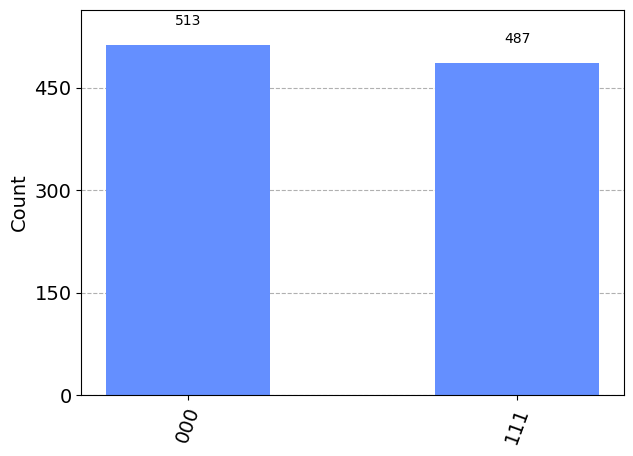

In [5]:
from qiskit.visualization import plot_histogram

plot_histogram(task.result().get_counts())

## Real devices

In [8]:
from qiskit_braket_provider import BraketProvider

provider = BraketProvider()

In [10]:
print(provider.backends())

NoRegionError: You must specify a region.

In [13]:
#devices
#ionq_device = provider.get_backend("IonQ Device")

#rigetti_device = provider.get_backend("Aspen-M-1")

#oqc_device = provider.get_backend("Lucy")

## Run local vqe with braket

In [11]:
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import BackendEstimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit_algorithms.utils import algorithm_globals

from qiskit_braket_provider import BraketLocalBackend, BraketProvider

seed = 50
algorithm_globals.random_seed = seed


In [12]:
H2_op = SparsePauliOp(
    ["II", "IZ", "ZI", "ZZ", "XX"],
    coeffs=[
        -1.052373245772859,
        0.39793742484318045,
        -0.39793742484318045,
        -0.01128010425623538,
        0.18093119978423156,
    ],
)

estimator = BackendEstimator(
    local_simulator,
    options={"seed_transpiler": seed, "seed_simulator": seed},
    skip_transpilation=False,
)
ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
slsqp = SLSQP(maxiter=1)

vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=slsqp)

result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 9,
    'eigenvalue': -1.0677300972443868,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f9f85ff6890>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 3.611860069224077,
                              ParameterVectorElement(θ[1]): 4.19301252102391,
                              ParameterVectorElement(θ[2]): 0.6019852007557844,
                              ParameterVectorElement(θ[3]): 5.949536809130025,
                              ParameterVectorElement(θ[4]): -3.3070470445355764,
                              ParameterVectorElement(θ[5]): 1.8462931831829383,
                              ParameterVectorElement(θ[6]): -5.466043598406607,
                              ParameterVectorElement(θ[7]): 0.6984088030463615},
    'optimal_point': array([ 3.61186007,  4.19301252,  0.6019852 ,  5.94953681, -3.30704704,
        1.84629318, -5.4660436 ,  0.6984088 ]),
    'optimal_v